#### PASCAL VOC 2012 Data View


Following box downloads and extracts the Dataset Files. If you have already completed this step manually you can skip it. 

In [84]:
import requests
from tqdm import tqdm
import zipfile

url = "https://huggingface.co/datasets/ikaankeskin/PASCAL_MLX/resolve/main/VOC2012.zip"
response = requests.get(url, stream=True)

# Get the total file size
file_size = int(response.headers.get('content-length', 0))

# Download the file with progress
zip_filename = 'VOC2012.zip'
with open(zip_filename, 'wb') as file, tqdm(
    desc="Downloading",
    total=file_size,
    unit="B",
    unit_scale=True,
    unit_divisor=1024,
) as bar:
    for data in response.iter_content(chunk_size=1024):
        file.write(data)
        bar.update(len(data))

# Extract the contents of the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()


Downloading:  18%|█▊        | 340M/1.80G [00:13<01:01, 25.5MB/s] 


KeyboardInterrupt: 

In [75]:
import os
import cv2
import random
import shutil
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET 
print(os.listdir('VOC2012'))

['Annotations', 'JPEGImages']


# JPEGImages

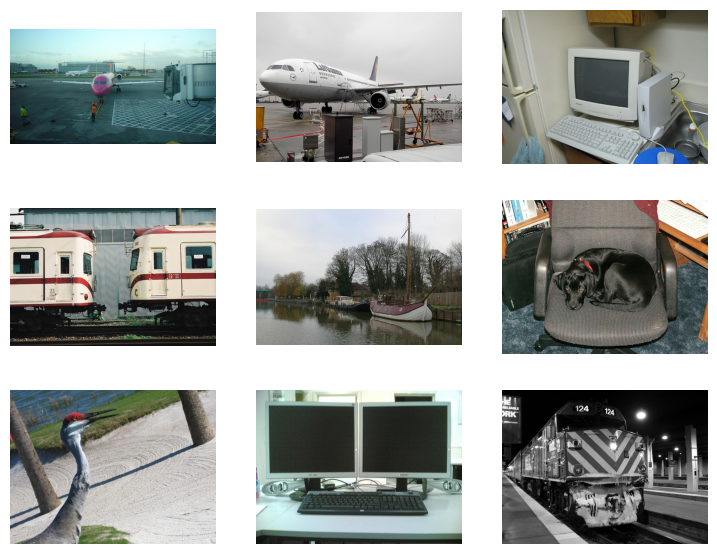

In [76]:
paths=[]
for dirname, _, filenames in os.walk('VOC2012/JPEGImages'):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
paths.sort()
fig, axs = plt.subplots(3,3,figsize=(9,7))
for i in range(9):
    r=i//3
    c=i%3
    img = plt.imread(paths[i+1])
    ax=axs[r][c].axis("off")
    ax=axs[r][c].imshow(img)
plt.show()

# Annotations

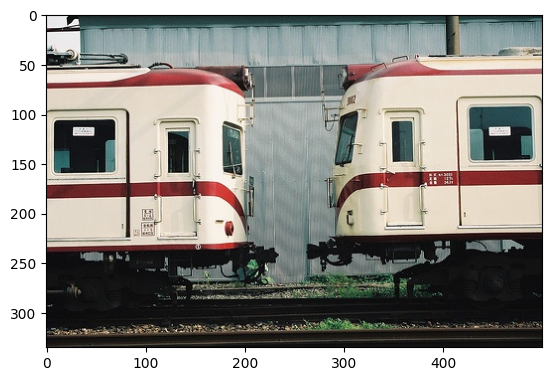

In [77]:
file = '2007_000042'

image=plt.imread(f'VOC2012/JPEGImages/{file}.jpg')
plt.imshow(image)
plt.show()

In [78]:
xml_path='VOC2012/Annotations/'+file+'.xml'

with open(xml_path, 'r') as file:
    xml_data = file.read()


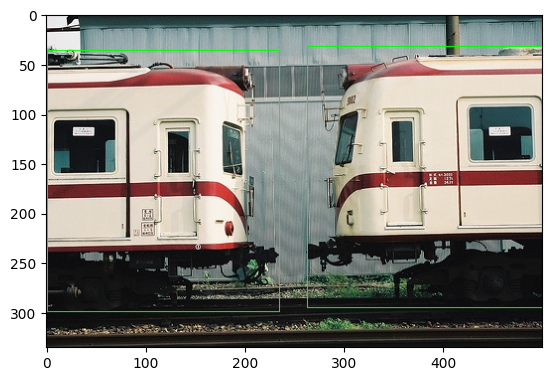

,filename,width,height,depth,object_name,object_pose,object_truncated,object_difficult,object_xmin,object_ymin,object_xmax,object_ymax
0,2007_000042.jpg,500,335,3,train,Unspecified,1,0,263,32,500,295
1,2007_000042.jpg,500,335,3,train,Unspecified,1,0,1,36,235,299


In [79]:
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

tree = ET.parse(xml_path)
root = tree.getroot()

# Extract general image information
filename = root.find("filename").text
width, height, depth = map(int, (root.find(f"size/{tag}").text for tag in ['width', 'height', 'depth']))

# Define a function to extract object details
def extract_object_details(obj_elem):
    bbox = {f"object_{tag}": int(obj_elem.find(f"bndbox/{tag}").text) for tag in ['xmin', 'ymin', 'xmax', 'ymax']}
    return {
        **{'filename': filename, 'width': width, 'height': height, 'depth': depth},
        'object_name': obj_elem.find("name").text,
        'object_pose': obj_elem.find("pose").text,
        'object_truncated': int(obj_elem.find("truncated").text),
        'object_difficult': int(obj_elem.find("difficult").text),
        **bbox
    }

data_dict = {key: [] for key in ['filename', 'width', 'height', 'depth', 'object_name', 'object_pose', 'object_truncated', 'object_difficult', 'object_xmin', 'object_ymin', 'object_xmax', 'object_ymax']}

color_mapping = {'train': (0, 255, 0), 'person': (0, 0, 255)}

for obj_elem in root.findall("object"):
    obj_details = extract_object_details(obj_elem)
    for key, value in obj_details.items():
        data_dict[key].append(value)

    obj_name = obj_details['object_name']
    if obj_name in color_mapping:
        cv2.rectangle(image, (obj_details['object_xmin'], obj_details['object_ymin']), (obj_details['object_xmax'], obj_details['object_ymax']), color_mapping[obj_name], 1)

plt.imshow(image)
plt.show()

df = pd.DataFrame(data_dict)
display(df)